[View in Colaboratory](https://colab.research.google.com/github/aishasonkar/Big_mart_analysis/blob/master/Big_mart.ipynb)

### The libraries are ###
1. Python 
2. Scikit-learn
3. Pandas
4.matplotlib
Numpy

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### Big Mart Analysis by Simran

### Big Mart Sales Analysis ##


The project is at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales




In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/poojayadav786/Big-mart-sales-prediction/master/Big_mart.csv')

###  About the Dataset ###
Data is in the form of comma separated values. The data is stored in tebular form.here we have 12 columns.


<img src="http://www.minutoms.com.br/wp-content/uploads/2014/10/big-mart.jpg" width="100%"height="60%">

### Attributes are: ###
1.Item_Identifier
2.Item_Weight
3.Item_Fat_Content
4.Item_Visibility
5 Item_Type
6.Item_MRP
7.Outlet_Identifier
8 Outlet_Establishment_Year
9 Outlet_Size
10 Outlet_Location_Type
11 Outlet_Type
12 Item_Outlet_Sales


In [51]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### size of Data ###

In [52]:
df.size


102276

### Shape of data ###

In [53]:

df.shape

(8523, 12)

In [54]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### null values in our data ###

In [55]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling null values ###

In [0]:
df.Item_Weight=df.Item_Weight.fillna(df.Item_Weight.mean())


In [57]:
df.Item_Weight

0        9.300000
1        5.920000
2       17.500000
3       19.200000
4        8.930000
5       10.395000
6       13.650000
7       12.857645
8       16.200000
9       19.200000
10      11.800000
11      18.500000
12      15.100000
13      17.600000
14      16.350000
15       9.000000
16      11.800000
17       9.000000
18      12.857645
19      13.350000
20      18.850000
21      12.857645
22      14.600000
23      12.857645
24      13.850000
25      13.000000
26       7.645000
27      11.650000
28       5.925000
29      12.857645
          ...    
8493     7.420000
8494    15.200000
8495     9.695000
8496     7.420000
8497    13.650000
8498    15.350000
8499    11.600000
8500    20.350000
8501     5.340000
8502     8.420000
8503    20.500000
8504    12.857645
8505    10.500000
8506    17.250000
8507     5.880000
8508    11.350000
8509     8.100000
8510    13.800000
8511    17.500000
8512    20.700000
8513    12.000000
8514    15.000000
8515    20.700000
8516    18.600000
8517    20

In [0]:
df.Outlet_Size=df.Outlet_Size.fillna('missing')


### Remove all null values ###

In [59]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['low fat', 'LF', 'lf'], 'Low Fat')


In [61]:
df.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
5       Regular
6       Regular
7       Low Fat
8       Regular
9       Regular
10      Low Fat
11      Regular
12      Regular
13      Regular
14      Low Fat
15      Regular
16      Low Fat
17      Regular
18      Low Fat
19      Low Fat
20      Regular
21      Regular
22      Low Fat
23      Low Fat
24      Regular
25      Low Fat
26      Regular
27      Low Fat
28      Regular
29      Regular
         ...   
8493    Regular
8494    Low Fat
8495    Low Fat
8496    Regular
8497    Low Fat
8498    Low Fat
8499    Low Fat
8500    Low Fat
8501    Regular
8502    Low Fat
8503    Low Fat
8504    Low Fat
8505    Regular
8506    Low Fat
8507    Regular
8508    Regular
8509    Low Fat
8510    Regular
8511    Low Fat
8512    Low Fat
8513    Regular
8514    Regular
8515    Low Fat
8516    Low Fat
8517        reg
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, 

In [0]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['regular', 'reg'], 'Regular')


In [63]:
df.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
5       Regular
6       Regular
7       Low Fat
8       Regular
9       Regular
10      Low Fat
11      Regular
12      Regular
13      Regular
14      Low Fat
15      Regular
16      Low Fat
17      Regular
18      Low Fat
19      Low Fat
20      Regular
21      Regular
22      Low Fat
23      Low Fat
24      Regular
25      Low Fat
26      Regular
27      Low Fat
28      Regular
29      Regular
         ...   
8493    Regular
8494    Low Fat
8495    Low Fat
8496    Regular
8497    Low Fat
8498    Low Fat
8499    Low Fat
8500    Low Fat
8501    Regular
8502    Low Fat
8503    Low Fat
8504    Low Fat
8505    Regular
8506    Low Fat
8507    Regular
8508    Regular
8509    Low Fat
8510    Regular
8511    Low Fat
8512    Low Fat
8513    Regular
8514    Regular
8515    Low Fat
8516    Low Fat
8517    Regular
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, 

 ### Now our data data is  clean  ###

### We perform Exploratory data analysis ###
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis  which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.



In Univariante analysis. we have only one variable we plot the graph ..
This is catagorical data graph.
Here we have 12  items.
This graph is show vegetable and fruits are more than other items.
This graph also show seafoods are very less than other items.


### Item_Type ###

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


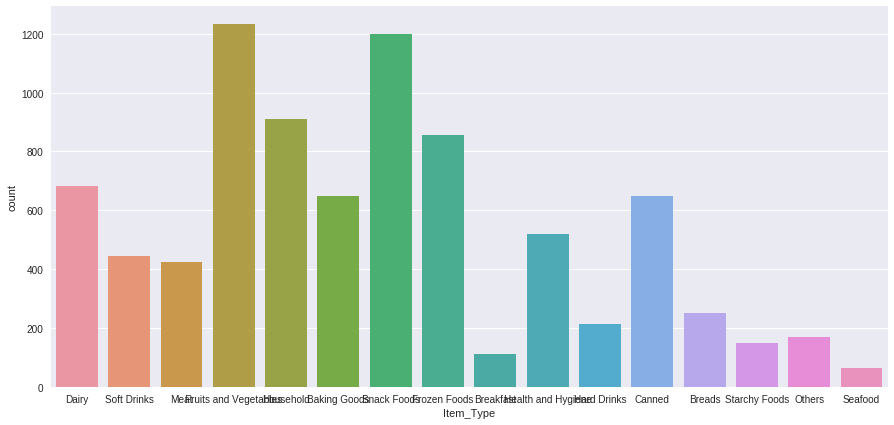

In [64]:
plt.figure(figsize=(15,7))


sns.countplot(x="Item_Type",data=df)

### item_Fat_Content ###
This graph is also Univariante graph.
This graph is show Low fat  is more than regular fat.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


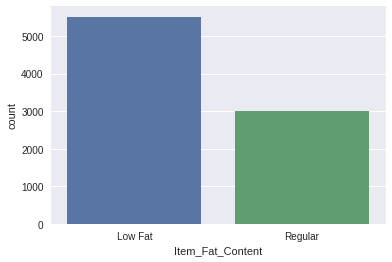

In [65]:



sns.countplot(x="Item_Fat_Content",data=df)

### Outlet Size ###
This is also catagorical data graph.
This graph is show Outlet_Size medium is more than other.
This graph is also show Outlet_size high is low than other

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


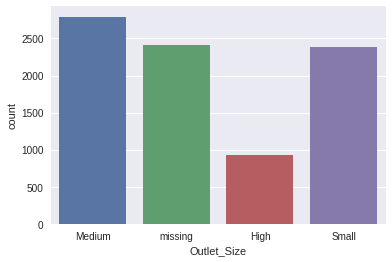

In [66]:
#plt.figure(figsize=(8,8))#
sns.countplot(x="Outlet_Size",data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


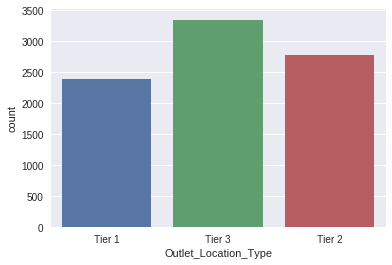

In [67]:

sns.countplot(x="Outlet_Location_Type",data=df)

###  Outlet_Establishment_Year ###
This is Univariante graph.
This shows Outlet Establishment year.
1985 is the year where was more establishment


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


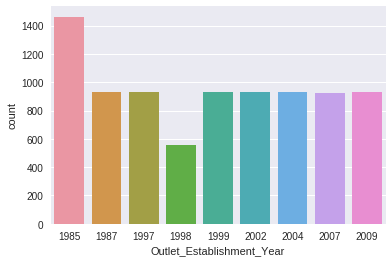

In [68]:
sns.countplot(x="Outlet_Establishment_Year",data=df)

### Item _MRP ###
This graph is also univariant. 
This is continuous in nature.
Between 100 to 200 we hve high ItemMRP 

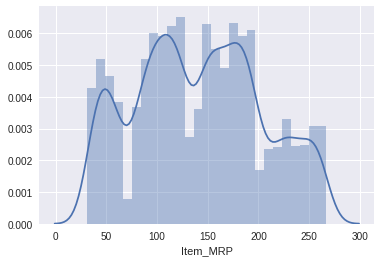

In [69]:
sns.distplot(df['Item_MRP'])


### This  is also Univariante ###
this is continous in nature.
this is box plot graph.
Between 100-200 have high Item_MRP

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


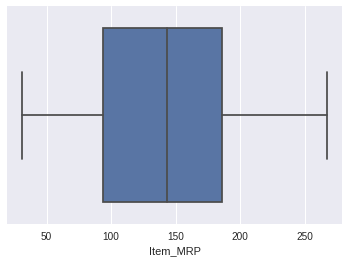

In [70]:
sns.boxplot(df['Item_MRP'])


### This is Univariante Analysis ###
this is continous in nature
this is left skew

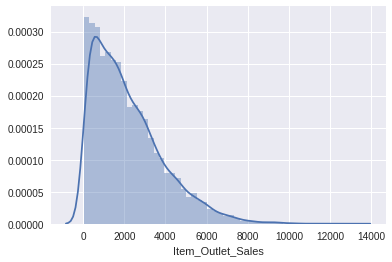

In [71]:
sns.distplot(df['Item_Outlet_Sales'])


### This  is Univariante Analysis ###
this is box plot graph.
this graph have many outliers.
Between  100-2000 we have many outlet sales.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


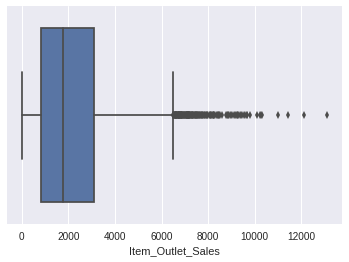

In [72]:
sns.boxplot(df['Item_Outlet_Sales'])


### Item_Visibility ###
This is Univariante graph.
This is continuous in nature.
This graph is right skew.
Between 0.00 to 0.20 we have many item visibility.

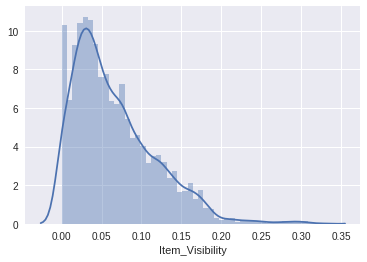

In [73]:
sns.distplot(df['Item_Visibility'])


### Item Visibility ###
This is also Univariante graph.
this is box plot graph.
This graph have many oulier.
Between 0.03-0.10 have more item visibility.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


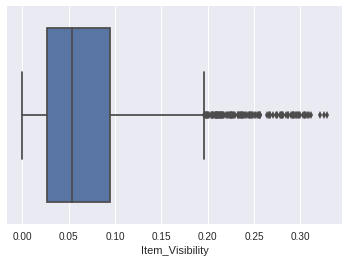

In [74]:
sns.boxplot(df['Item_Visibility'])

### Bivariante Analysis ###

In [75]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


### this graph is show corrlation between attributes. ###

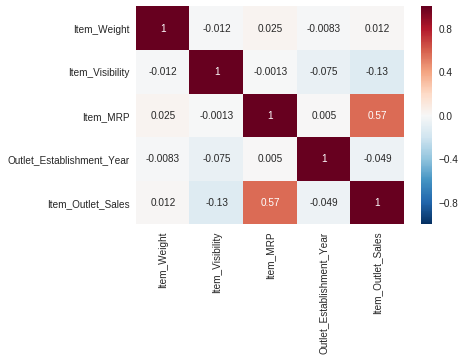

In [76]:
sns.heatmap(df.corr(),annot=True)


### Item_Outlet_Sales v/s Item_MRP ###


### This is Bivariante Analysis Graph ###
in Bivariant we require two variables.
Here we plot graph between Item_MRP and Item_Outlet_Sales.
This graph is show Item_MRP increase as well as Item_outlet sale increase.

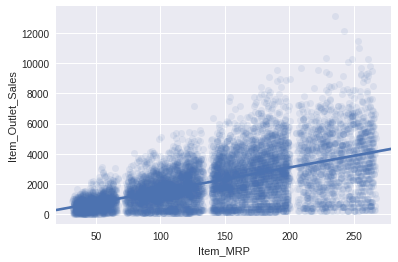

In [77]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,scatter_kws={'alpha':0.1})

### Item_Visibility Vs Item Outlet_sales###
This is continuous in nature.
This show decreasing item_visibility.
This graph have many outlier.





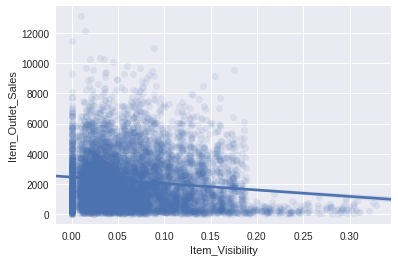

In [78]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,scatter_kws={'alpha':0.1})

### Outlet_Establishment_Year Vs Item_Visibility ###
This is bar plot graph.
This is not continous in nature.
In 200 and 1985 hav many item visibility

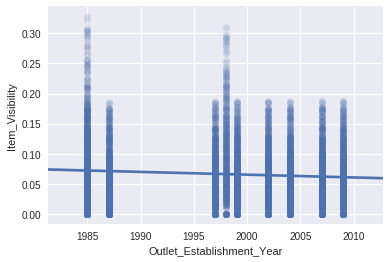

In [79]:
sns.regplot(x='Outlet_Establishment_Year',y='Item_Visibility',data=df,scatter_kws={'alpha':0.1})

### Multivariante Analysis ###
Multivariate Data Analysis refers to any statistical technique used to analyze data that arises from more than one variable. This essentially models reality where each situation, product, or decision involves more than a single variable.The techniques are especially valuable when working with correlated variables.





This is multivariante graph.
Here we have two variable one is Item_MRP and Item fat content.
This is continous in nature.
Here we have two categories of Item_fat_Content. 

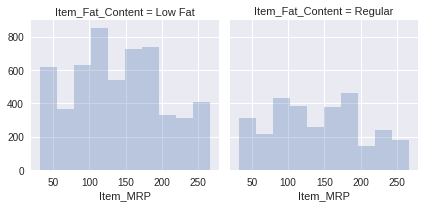

In [80]:


grid=sns.FacetGrid(df,col='Item_Fat_Content',)
grid.map(plt.hist,'Item_MRP',alpha=0.3)


This is also multivariante graph.
Here we have many Identifier
Here we have many item types.
For every item types we have unique identifier. 


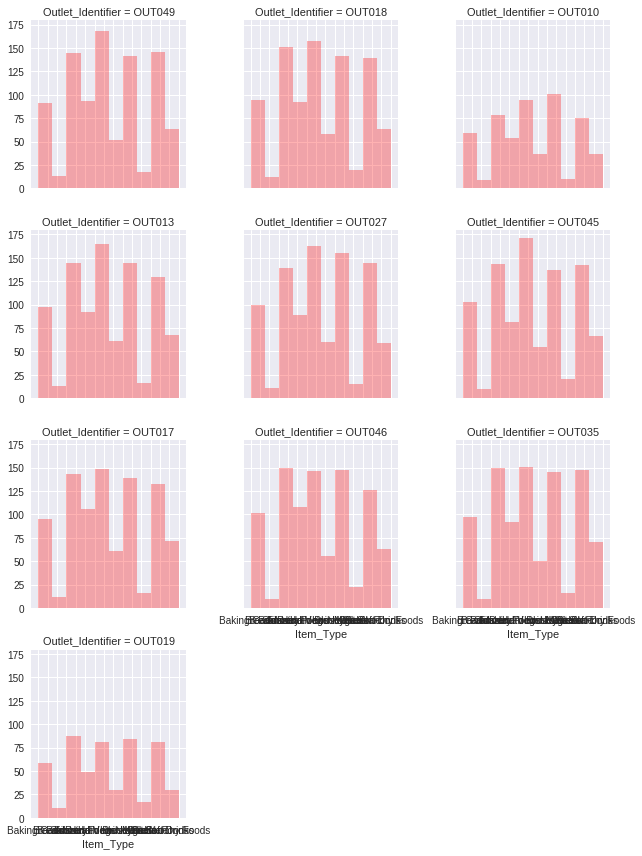

In [81]:
grid=sns.FacetGrid(df,col='Outlet_Identifier',col_wrap=3)
grid.map(plt.hist,'Item_Type',alpha=0.3,color='r')


### feature engineering ###

In [82]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
df=df.drop(['Item_Identifier'],axis=1)


In [0]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [85]:
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920000,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.500000,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200000,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930000,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,10.395000,0.000000,51.4008,OUT018,2009,556.6088,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
6,13.650000,0.012741,57.6588,OUT013,1987,343.5528,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
7,12.857645,0.127470,107.7622,OUT027,1985,4022.7636,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
8,16.200000,0.016687,96.9726,OUT045,2002,1076.5986,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
9,19.200000,0.094450,187.8214,OUT017,2007,4710.5350,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


### Linear Regression 

In [0]:
df_reg=pd.get_dummies(df,columns=['Outlet_Identifier'])


In [0]:

labels=df['Item_Outlet_Sales']


In [0]:
df_reg=df_reg.drop(['Item_Outlet_Sales'],axis=1)


In [106]:
df_reg.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Now we train our model ###

In [0]:
from sklearn.linear_model import LinearRegression


In [0]:
linear=LinearRegression()

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_reg, labels, test_size=0.30, random_state = 0)


In [94]:
linear.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### score ###

In [95]:
linear.score(X_test,Y_test)

0.5627080481600449

### RandomForest Regressor###

In [0]:
from sklearn.ensemble import RandomForestRegressor


In [0]:
random=RandomForestRegressor()


In [98]:
random.fit(X_train,Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Score ###

In [101]:
random.score(X_test,Y_test)


0.5243475972367854

### DecisionTreeRegressor###

In [0]:
from sklearn.tree import DecisionTreeRegressor


In [0]:
decision= DecisionTreeRegressor()


In [104]:
decision.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### score ###

In [105]:
decision.score(X_test,Y_test)

0.20936635606689435

### Conclusion ###

Here we have big_mart data set.we analysis this dataset.firstly we explore the dataset.And then we clean the dataset.We impute the missing values and solve some Irregularities.And we have done EDA(Exploratory Data Analysis)
Here we make Univariante graph,Bivariante graph and Multivariante graph.And the we perform Feature Engineering.Then we train our our data on different types of model(Linear_Regression,DecisionTreeRegression,RandomForestRegressor).we find best result from LinearRegression model.we find 52% score.it is better than other models.